# PySpark DataFrame Visualization Demo

Use the helpers in `spark_fuse.utils.visualization` to quickly explore PySpark `DataFrame` objects. Each example below samples a manageable amount of data, converts it to pandas, and renders with `matplotlib`.

> **Note:** Make sure `matplotlib` is installed in your environment (e.g., `pip install matplotlib`).

In [1]:
%matplotlib inline

In [2]:
from spark_fuse.spark import create_session
from spark_fuse.utils.visualization import (
    plot_histogram,
    plot_scatter,
    plot_line,
    plot_bar,
)

In [3]:
spark = create_session(app_name="spark-fuse-visualization-demo")
spark

:: loading settings :: url = jar:file:/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pyspark/jars/ivy-2.5.3.jar!/org/apache/ivy/core/settings/ivysettings.xml
Ivy Default Cache set to: /Users/kevin/.ivy2.5.2/cache
The jars for the packages stored in: /Users/kevin/.ivy2.5.2/jars
io.delta#delta-spark_2.13 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a85d9abe-4d96-4a6c-abc8-cc4fde32dae7;1.0
	confs: [default]
	found io.delta#delta-spark_2.13;4.0.0 in central
	found io.delta#delta-storage;4.0.0 in central
	found org.antlr#antlr4-runtime;4.13.1 in central
:: resolution report :: resolve 128ms :: artifacts dl 3ms
	:: modules in use:
	io.delta#delta-spark_2.13;4.0.0 from central in [default]
	io.delta#delta-storage;4.0.0 from central in [default]
	org.antlr#antlr4-runtime;4.13.1 from central in [default]
	---------------------------------------------------------------------
	|                  |            modules      

## Sample dataset
Generate a tiny sales set with date, region, order count, and revenue columns.

In [4]:
from pyspark.sql import functions as F

data = [
    ("2024-01-01", "North", 120, 1200.0),
    ("2024-01-02", "South", 95, 1025.0),
    ("2024-01-03", "West", 80, 875.0),

    ("2024-01-04", "North", 150, 1600.0),
    ("2024-01-05", "South", 110, 1190.0),
    ("2024-01-06", "West", 70, 780.0),

    ("2024-01-07", "North", 140, 1550.0),
    ("2024-01-08", "South", 100, 1080.0),
    ("2024-01-09", "West", 90, 950.0),
]

sales_df = spark.createDataFrame(data, ['date_str', 'region', 'orders', 'revenue'])
sales_df = sales_df.withColumn('date', F.to_date('date_str')).drop('date_str')
sales_df = sales_df.orderBy('date')
sales_df

DataFrame[region: string, orders: bigint, revenue: double, date: date]

In [5]:
sales_df.show()

+------+------+-------+----------+
|region|orders|revenue|      date|
+------+------+-------+----------+
| North|   120| 1200.0|2024-01-01|
| South|    95| 1025.0|2024-01-02|
|  West|    80|  875.0|2024-01-03|
| North|   150| 1600.0|2024-01-04|
| South|   110| 1190.0|2024-01-05|
|  West|    70|  780.0|2024-01-06|
| North|   140| 1550.0|2024-01-07|
| South|   100| 1080.0|2024-01-08|
|  West|    90|  950.0|2024-01-09|
+------+------+-------+----------+



## Histogram: order distribution
Use `plot_histogram` to inspect the spread of order volume.

<Axes: title={'center': 'Distribution of orders'}, xlabel='orders', ylabel='count'>

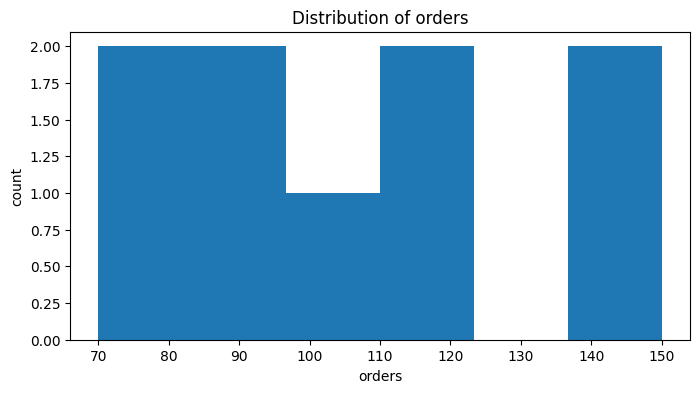

In [6]:
plot_histogram(sales_df, column='orders', bins=6)

## Scatter plot: orders vs. revenue by region
Color-coding makes it easy to contrast patterns between regions.

<Axes: title={'center': 'revenue vs orders'}, xlabel='orders', ylabel='revenue'>

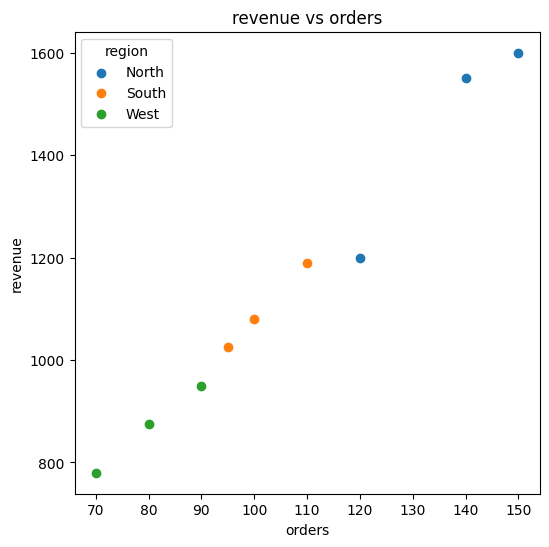

In [7]:
plot_scatter(
    sales_df,
    x_col='orders',
    y_col='revenue',
    color_col='region',
    legend=True,
)

## Line plot: revenue trend
Sort by date and render revenue over time.

<Axes: title={'center': 'revenue over date'}, xlabel='date', ylabel='revenue'>

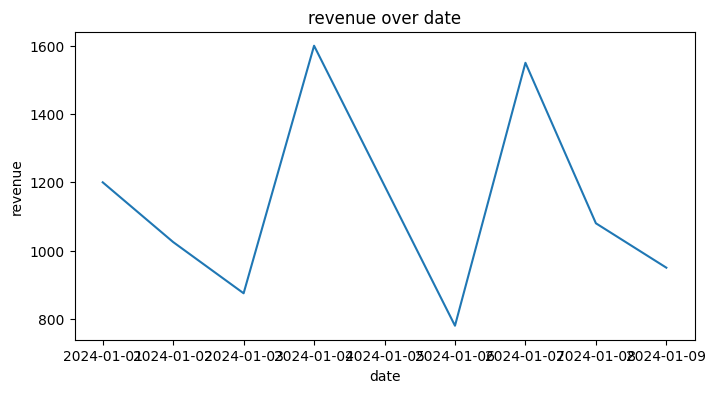

In [8]:
plot_line(
    sales_df,
    x_col='date',
    y_col='revenue',
    order_by='date',
)

## Bar chart: total revenue per region
Aggregate by region using `plot_bar`.

<Axes: title={'center': 'sum(revenue) by region'}, xlabel='region', ylabel='sum(revenue)'>

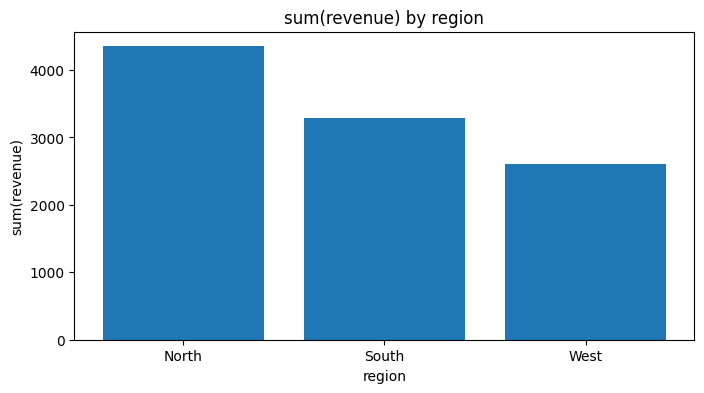

In [9]:
plot_bar(
    sales_df,
    category_col='region',
    value_col='revenue',
    agg_func='sum',
)

In [10]:
spark.stop()